# **Installing the packages and Dependencies**

In [0]:
!pip3 install scipy==1.1.0 --user

In [0]:
!sudo apt-get update
# Opencv-Deps
!sudo apt-get install build-essential checkinstall cmake pkg-config yasm
!sudo apt-get install git gfortran
!sudo apt-get install libjpeg8-dev libjasper-dev libpng12-dev
!sudo apt-get install libtiff5-dev
!sudo apt-get install libavcodec-dev libavformat-dev libswscale-dev libdc1394–22-dev
!sudo apt-get install libxine2-dev libv4l-dev
!sudo apt-get install libgstreamer0.10-dev libgstreamer-plugins-base0.10-dev
!sudo apt-get install qt5-default libgtk2.0-dev libtbb-dev
!sudo apt-get install libatlas-base-dev
!sudo apt-get install libfaac-dev libmp3lame-dev libtheora-dev
!sudo apt-get install libvorbis-dev libxvidcore-dev
!sudo apt-get install libopencore-amrnb-dev libopencore-amrwb-dev
!sudo apt-get install x264 v4l-utils
!sudo apt-get install libprotobuf-dev protobuf-compiler
!sudo apt-get install libgoogle-glog-dev libgflags-dev
!sudo apt-get install libgphoto2-dev libeigen3-dev libhdf5-dev doxygen 
!sudo apt-get install python3-dev python3-pip

Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Fetched 252 kB in 1s (315 kB/s)
Reading package lists... Done
Reading package lists... Done
Building de

In [0]:
!pip3 install git+https://github.com/vatsalsaglani/xrayimage_extractfeatures.git

  Cloning https://github.com/vatsalsaglani/xrayimage_extractfeatures.git to /tmp/pip-req-build-x2arkju2
  Running command git clone -q https://github.com/vatsalsaglani/xrayimage_extractfeatures.git /tmp/pip-req-build-x2arkju2
  Created wheel for xtract-features: filename=xtract_features-0.1-cp36-none-any.whl size=7088 sha256=488634943b5d3387a24ebf78ebd3844f8f108ffc32d5fce515155e0eaf33e0b3
  Stored in directory: /tmp/pip-ephem-wheel-cache-3gjv0rjr/wheels/29/ca/10/fe8fe17a03ff08c2a1b39e91bf17eafb863ded35f9d566ffb6
Successfully built xtract-features


# **Note --  Restart the runtime after running the above code**

# **Mounting Drive and Downloading the dataset**

In [0]:
!git clone https://github.com/ujjwalkr1812/cataract_detection.git

In [0]:
cd cataract_detection

In [0]:
!cp -r dataset /content/

In [0]:
!cp -r seg_dataset /content/

In [0]:
!cp -r featureExtracted_dataset /content/

In [0]:
cd /content

/content


In [0]:
# from google.colab import drive
# drive.mount("/content/drive")

In [0]:
# cd "/content/drive/My Drive/retina_dataset/dataset"

In [0]:
# !cp -r "/content/drive/My Drive/retina_dataset/dataset" "/content/"

In [0]:
# !cp -r "/content/drive/My Drive/seg_dataset" "/content/"

In [0]:
# !cp -r "/content/drive/My Drive/featureExtracted_dataset" "/content/"

# **Importing the required packages**

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os
import csv
import scipy
from matplotlib import pyplot as plt
from skimage.measure import regionprops
from skimage.feature import greycomatrix, greycoprops
from xtract_features.extract import s_entropy, entropy_simple
from pywt import dwt2
import pandas as pd
import sklearn
from sklearn import metrics
import seaborn as sn
print(cv2.__version__)
print(scipy.__version__)

3.4.3
1.1.0


# **IMAGE ENHANCEMENT**

<class 'numpy.ndarray'>
1632   2464
Original Image


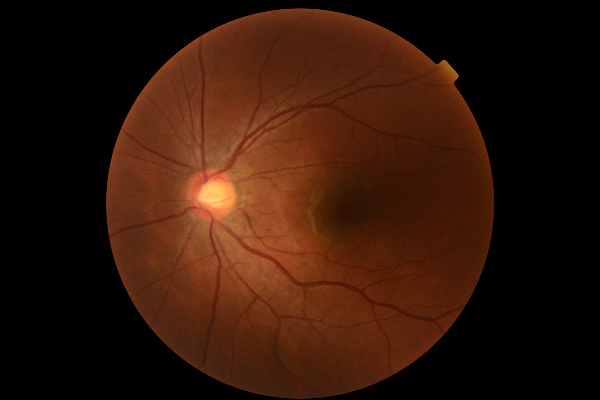

In [0]:
# reading the image
img = cv2.imread('/content/dataset/1_normal/NL_001.png')
print(type(img))
print(img.shape[0]," ",img.shape[1])
# img=cv2.resize(img, (600,400))
print("Original Image")
cv2_imshow(cv2.resize(img, (600,400)))
# print(img.shape[0]," ",img.shape[1])

# plt.imshow(img)
# plt.show()

Green Channel Grey Image


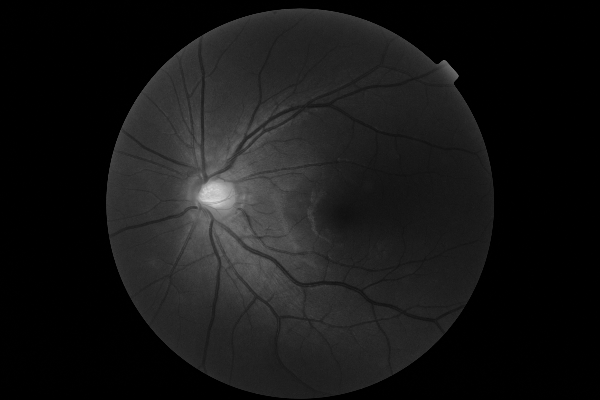

In [0]:
# taking only the green channel
blue, green, red = cv2.split(img)
print("Green Channel Grey Image")
cv2_imshow(cv2.resize(green, (600,400)))

Contrast Enhanced - Grey Image


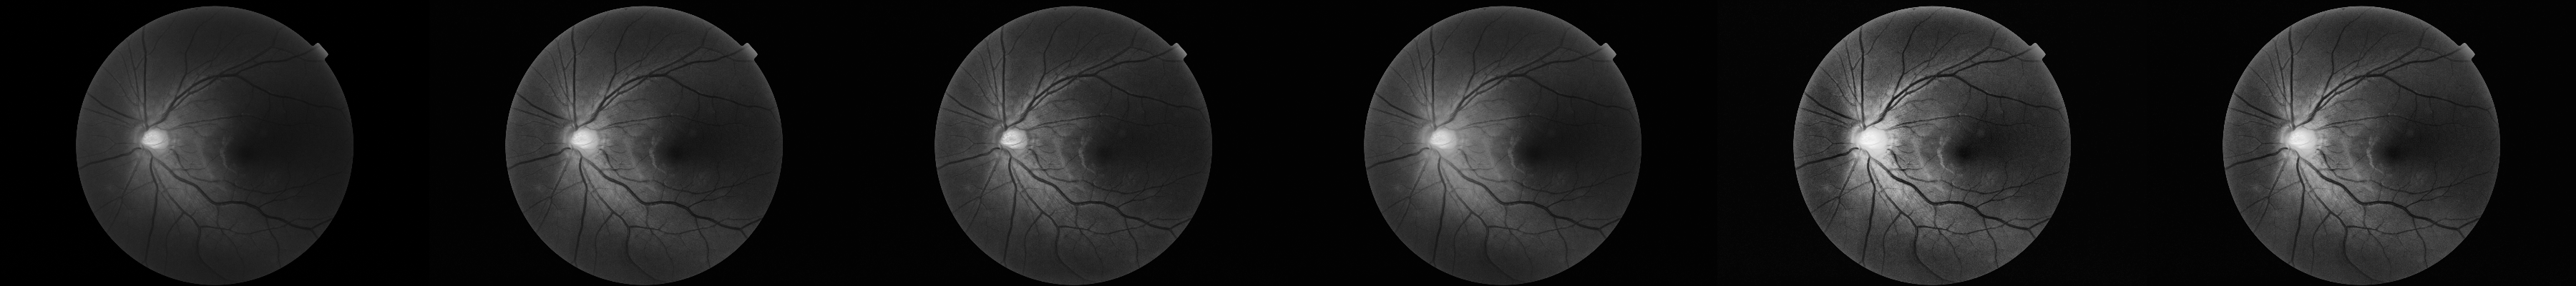

In [0]:
#Finding Parameters of CLAHE
c1 = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clahe1 = c1.apply(green)

c2 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe2 = c2.apply(green)

c3 = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
clahe3 = c3.apply(green)

c4 = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(32,32))
clahe4 = c4.apply(green)

c5 = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(2,2))
clahe5 = c5.apply(green)

contrast1 = np.hstack((green, clahe3 , clahe4, clahe5 , clahe1, clahe2))
print("Contrast Enhanced - Grey Image")
cv2_imshow(cv2.resize(contrast1, (3600,400)))

Contrast Enhanced - Grey Image


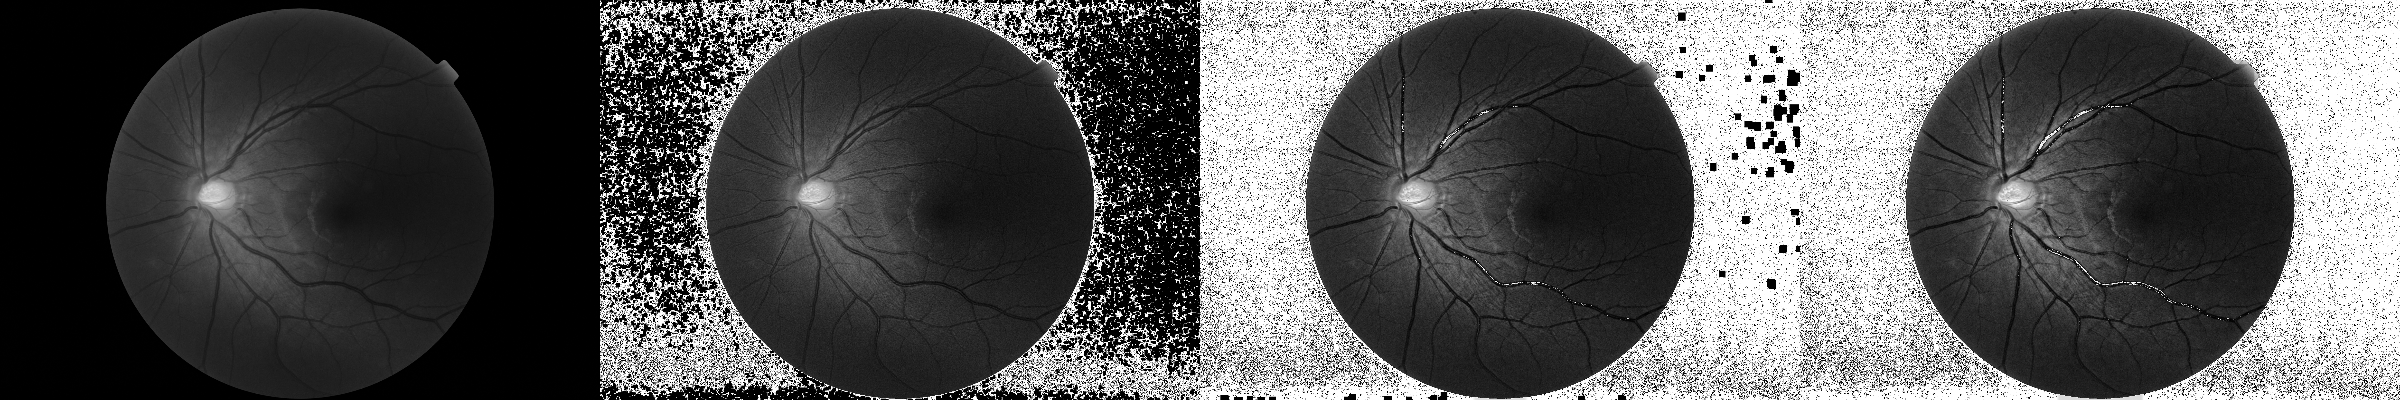

In [0]:
#Finding Parameters For Morphological Contrast Enhancement
k1 = np.ones((8,8),np.uint8)
tophat1 = cv2.morphologyEx(green, cv2.MORPH_TOPHAT, k1)
bottomhat1 = cv2.morphologyEx(green, cv2.MORPH_BLACKHAT,k1)
morphological1 = green + tophat1 - bottomhat1

k2 = np.ones((25,25),np.uint8)
tophat2 = cv2.morphologyEx(green, cv2.MORPH_TOPHAT, k2)
bottomhat2 = cv2.morphologyEx(green, cv2.MORPH_BLACKHAT,k2)
morphological2 = green + tophat2 - bottomhat2

k3 = np.ones((49,49),np.uint8)
tophat3 = cv2.morphologyEx(green, cv2.MORPH_TOPHAT, k3)
bottomhat3 = cv2.morphologyEx(green, cv2.MORPH_BLACKHAT,k3)
morphological3 = green + tophat3 - bottomhat3

contrast2 = np.hstack((green, morphological1, morphological2, morphological3))
print("Contrast Enhanced - Grey Image")
cv2_imshow(cv2.resize(contrast2, (2400,400)))

Contrast Enhanced - Grey Image


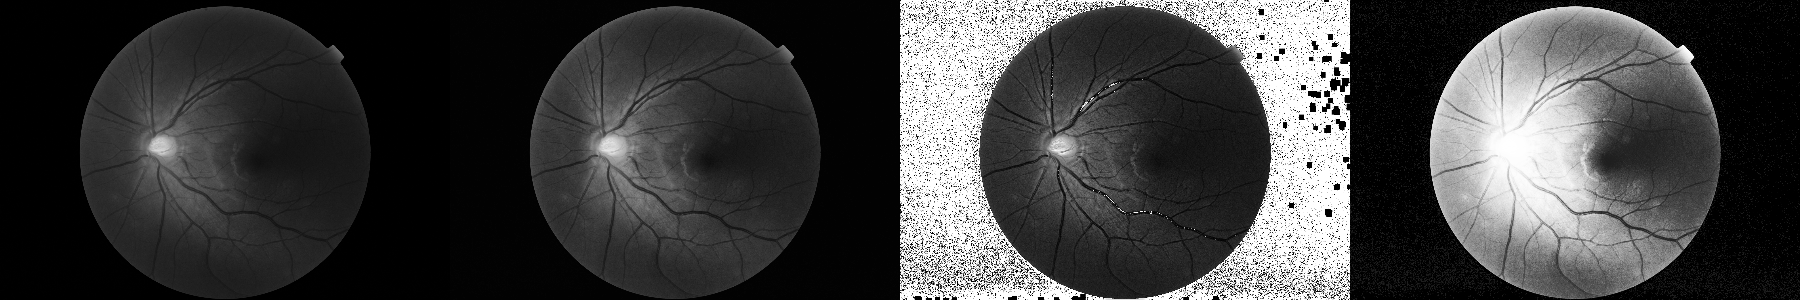

In [0]:
# CONTRAST IMPROVEMENT

# CLAHE
c = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
cl = c.apply(green)

#MORPHOLOGICAL
k = np.ones((25,25),np.uint8)
tophat = cv2.morphologyEx(green, cv2.MORPH_TOPHAT, k)
bottomhat = cv2.morphologyEx(green, cv2.MORPH_BLACKHAT,k)
morphological = green + tophat - bottomhat

#HISTOGRAM EQUALIZATION
equ = cv2.equalizeHist(green)

#PLORTTING
contrast3 = np.hstack((green, cl, morphological, equ))
print("Contrast Enhanced - Grey Image")
cv2_imshow(cv2.resize(contrast3, (1800,300)))

Sharpened - Grey Image


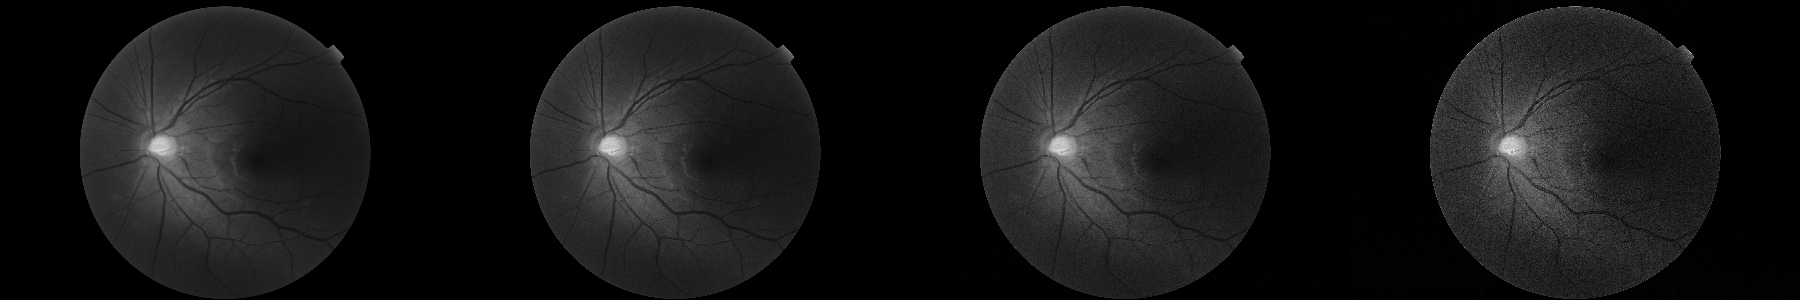

In [0]:
# EDGE ENHANCEMENT

# GAUSSIAN KERNEL
kernel_gaussian = np.array([[-1,-1,-1,-1,-1],
                             [-1,2,2,2,-1],
                             [-1,2,8,2,-1],
                             [-1,2,2,2,-1],
                             [-1,-1,-1,-1,-1]]) / 8.0

gaussian = cv2.filter2D(green, -1, kernel_gaussian)

#SIMPLE LAPLACIAN
kernel_laplacian1 = np.array([[0,-1,0],
                             [-1,5,-1],
                             [0,-1,0]])

laplacian1 = cv2.filter2D(green, -1, kernel_laplacian1)

#VARIENT LAPLACIAN
kernel_laplacian2 = np.array([[-1,-1,-1],
                             [-1,9,-1],
                             [-1,-1,-1]])

laplacian2 = cv2.filter2D(green, -1, kernel_laplacian2)

#PLOTTING
sharpen = np.hstack((green, gaussian, laplacian1, laplacian2))
print("Sharpened - Grey Image")
cv2_imshow(cv2.resize(sharpen, (1800,300)))

Statistical3x3 - Grey Image


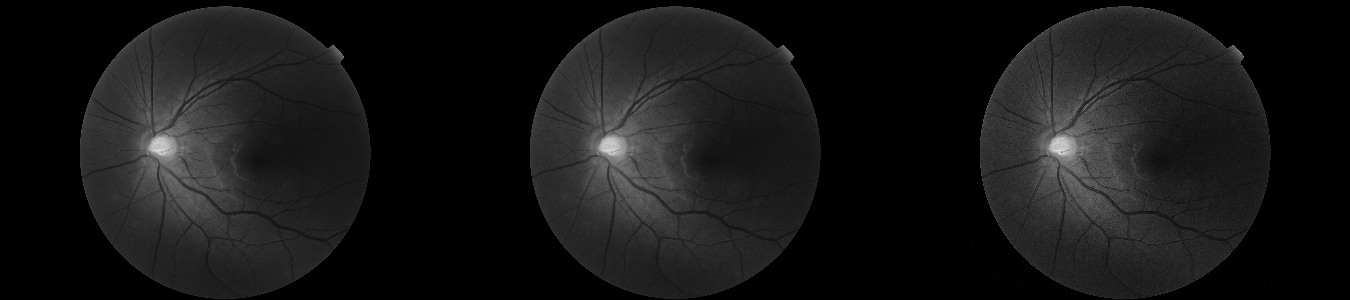

Statistical5x5 - Grey Image


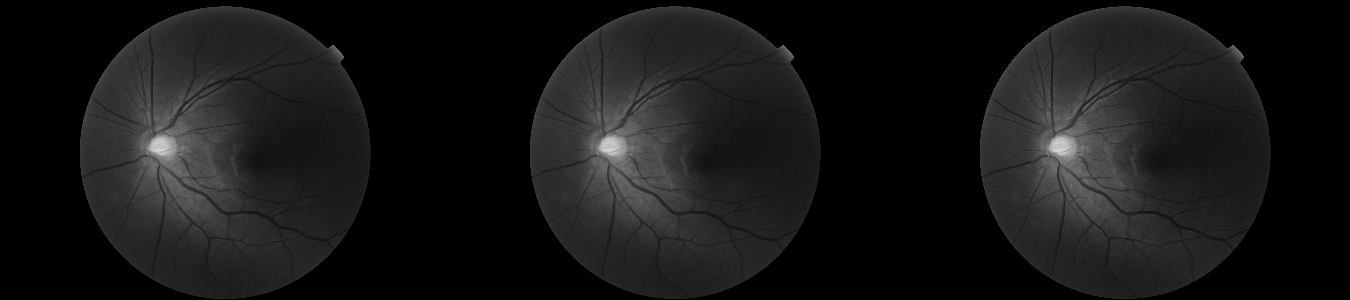

In [0]:
#NOISE REMOVAL USING MEDIAN FILTERING

# 3x3 Median Filter
gauss_median1 = cv2.medianBlur(gaussian, 3)
laplacian1_median1 = cv2.medianBlur(laplacian1, 3)
laplacian2_median1 = cv2.medianBlur(laplacian2, 3)

# 5x5 Median Filter
gauss_median2 = cv2.medianBlur(gaussian, 5)
laplacian1_median2 = cv2.medianBlur(laplacian1, 5)
laplacian2_median2 = cv2.medianBlur(laplacian2, 5)

#Plotting
statistical3x3 = np.hstack((gauss_median1, laplacian1_median1, laplacian2_median1))
print("Statistical3x3 - Grey Image")
cv2_imshow(cv2.resize(statistical3x3, (1350,300)))

statistical5x5 = np.hstack((gauss_median2, laplacian1_median2, laplacian2_median2))
print("Statistical5x5 - Grey Image")
cv2_imshow(cv2.resize(statistical5x5, (1350,300)))

Final Statistically Enhanced - Grey Image


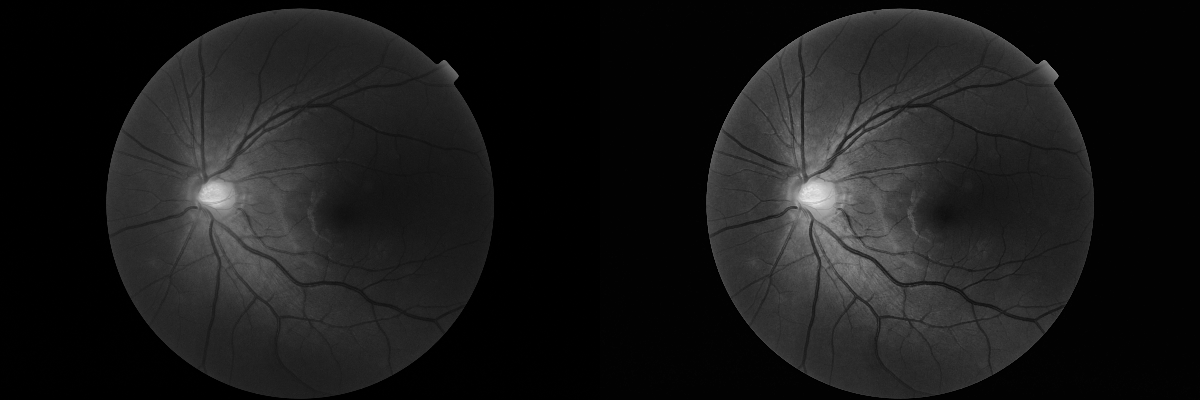

In [0]:
#Final Enhancement code (Pre-Processing)

# Contrast Improvement
ck = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
clahe = ck.apply(green)

# Sharpening
sk = np.array([[-1,-1,-1,-1,-1],
               [-1,2,2,2,-1],
               [-1,2,8,2,-1],
               [-1,2,2,2,-1],
               [-1,-1,-1,-1,-1]]) / 8.0
sharpened = cv2.filter2D(clahe, -1, sk)

# Noise Removal
enhanced = cv2.medianBlur(sharpened, 5)

#PLOTTING
finalEnhanced = np.hstack((green, enhanced))
print("Final Statistically Enhanced - Grey Image")
cv2_imshow(cv2.resize(finalEnhanced, (1200,400)))

# **IMAGE SEGMENTATION**

Segmentation Process


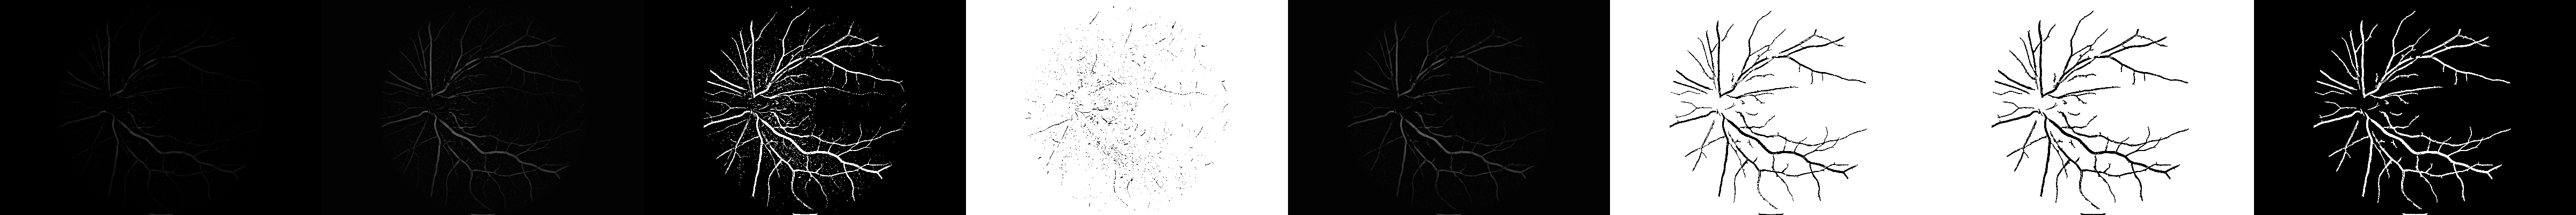

Cleaned - Grey Image


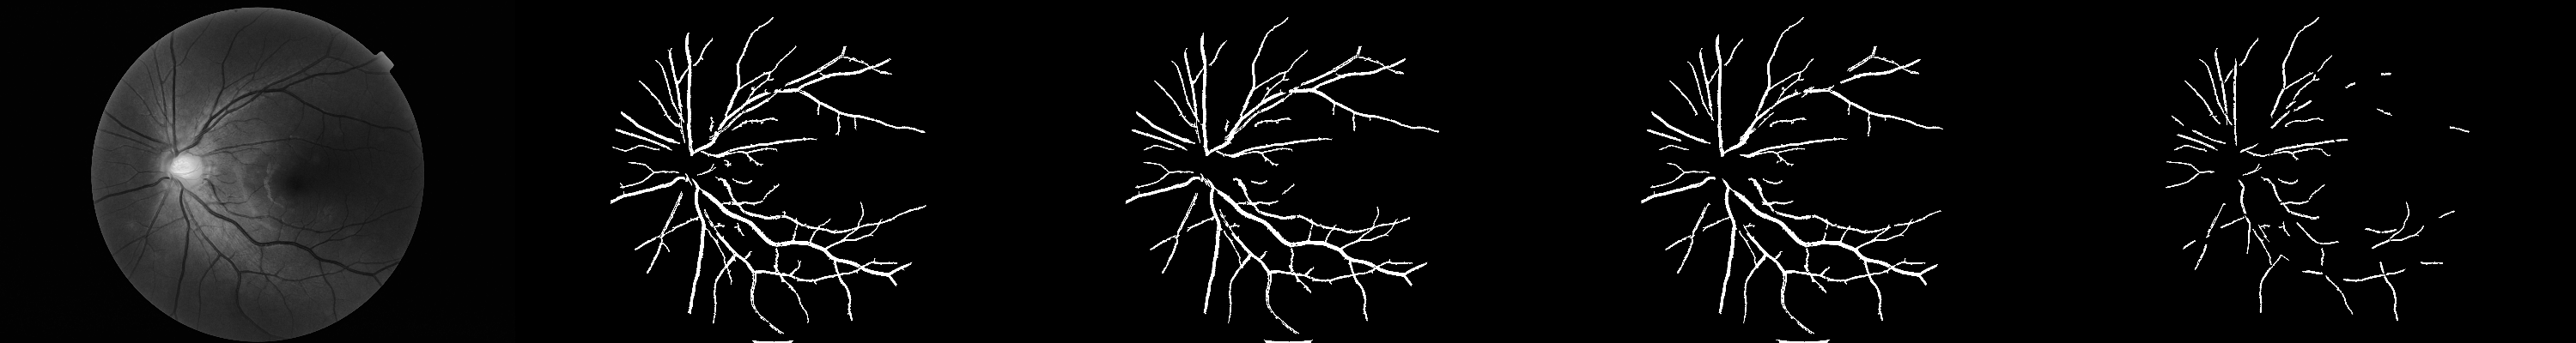

In [0]:
clahe11 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

morpClose1 = cv2.morphologyEx(enhanced, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=1)
morpClose2 = cv2.morphologyEx(morpClose1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=1)
morpClose3 = cv2.morphologyEx(morpClose2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations=1)
morpClose4 = cv2.morphologyEx(morpClose3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations=1)
morpClose5 = cv2.morphologyEx(morpClose4, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations=1)
morpClose6 = cv2.morphologyEx(morpClose5, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations=1)

diff1 = cv2.subtract(morpClose6,enhanced)
dfc1 = clahe11.apply(diff1)
ret1,dfct1 = cv2.threshold(dfc1, 15, 255, cv2.THRESH_BINARY)

mask1 = np.ones(dfc1.shape[:2], dtype="uint8")*255#shape[:2]=>shape[0] and shape[1]
#f6.copy() - to use a copy of the image since findContours alters the image
#cv2.RETR_LIST - retrieves all of the contours without establishing any hierarchical relationships
#cv2.CHAIN_APPROX_SIMPLE - all the boundary points are stored in memory efficient manner
img1, contours1, hierarchy1 = cv2.findContours(dfct1.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours1:#contours represent the shapes of objects found in an image
  if cv2.contourArea(cnt)<=300:# All contours of area less than 300
    cv2.drawContours(mask1, [cnt], -1, 0, -1)#Destination image, input contours - each contour is stored as a point vector, -1 signifies drawing all contours, 0 indicates black colored contours, -1 indicates the contour interiors are drawn
im1 = cv2.bitwise_and(dfc1, dfc1, mask=mask1)#adds param1 with param2 and mask is optional but here mask is req and f5 should remain so f5^f5 = f5
ret, fin1 = cv2.threshold(im1, 15, 255, cv2.THRESH_BINARY_INV)#Segmentation using Threshholding
newfin1 = cv2.erode(fin1, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), iterations=1)#Eroded to get the edges more joined
final_seg1 = 255 - newfin1#Inversing the image
# print(diff1)
#PLOTTING
seg11 = np.hstack((diff1, dfc1, dfct1, mask1, im1, fin1, newfin1, final_seg1))
print("Segmentation Process")
cv2_imshow(cv2.resize(seg11, (4800,400)))

morpClose7 = cv2.morphologyEx(enhanced, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations=1)
morpClose8 = cv2.morphologyEx(morpClose7, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations=1)
morpClose9 = cv2.morphologyEx(morpClose8, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations=1)
morpClose10 = cv2.morphologyEx(morpClose9, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations=1)
morpClose11= cv2.morphologyEx(morpClose10, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(29,29)), iterations=1)
morpClose12= cv2.morphologyEx(morpClose11, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(29,29)), iterations=1)

diff2 = cv2.subtract(morpClose12,enhanced)
dfc2 = clahe11.apply(diff2)
ret2,dfct2 = cv2.threshold(dfc2, 15, 255, cv2.THRESH_BINARY)
mask2 = np.ones(dfc2.shape[:2], dtype="uint8")*255#shape[:2]=>shape[0] and shape[1]
#f6.copy() - to use a copy of the image since findContours alters the image
#cv2.RETR_LIST - retrieves all of the contours without establishing any hierarchical relationships
#cv2.CHAIN_APPROX_SIMPLE - all the boundary points are stored in memory efficient manner
img2, contours2, hierarchy2 = cv2.findContours(dfct2.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours2:#contours represent the shapes of objects found in an image
  if cv2.contourArea(cnt)<=300:# All contours of area less than 300
    cv2.drawContours(mask2, [cnt], -1, 0, -1)#Destination image, input contours - each contour is stored as a point vector, -1 signifies drawing all contours, 0 indicates black colored contours, -1 indicates the contour interiors are drawn
im2 = cv2.bitwise_and(dfc2, dfc2, mask=mask2)#adds param1 with param2 and mask is optional but here mask is req and f5 should remain so f5^f5 = f5
ret, fin2 = cv2.threshold(im2, 15, 255, cv2.THRESH_BINARY_INV)#Segmentation using Threshholding
newfin2 = cv2.erode(fin2, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), iterations=1)#Eroded to get the edges more joined
final_seg2 = 255 - newfin2#Inversing the image


morpClose13 = cv2.morphologyEx(enhanced, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=2)
morpClose14= cv2.morphologyEx(morpClose13, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=2)
morpClose15= cv2.morphologyEx(morpClose14, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations=3)
morpClose16 = cv2.morphologyEx(morpClose15, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations=3)
morpClose17= cv2.morphologyEx(morpClose16, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations=1)
morpClose18= cv2.morphologyEx(morpClose17, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations=1)

diff3 = cv2.subtract(morpClose18,enhanced)
dfc3 = clahe11.apply(diff3)
ret3,dfct3 = cv2.threshold(dfc3, 15, 255, cv2.THRESH_BINARY)
mask3 = np.ones(dfc3.shape[:2], dtype="uint8")*255#shape[:2]=>shape[0] and shape[1]
#f6.copy() - to use a copy of the image since findContours alters the image
#cv2.RETR_LIST - retrieves all of the contours without establishing any hierarchical relationships
#cv2.CHAIN_APPROX_SIMPLE - all the boundary points are stored in memory efficient manner
img3, contours3, hierarchy3 = cv2.findContours(dfct3.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours3:#contours represent the shapes of objects found in an image
  if cv2.contourArea(cnt)<=300:# All contours of area less than 300
    cv2.drawContours(mask3, [cnt], -1, 0, -1)#Destination image, input contours - each contour is stored as a point vector, -1 signifies drawing all contours, 0 indicates black colored contours, -1 indicates the contour interiors are drawn
im3 = cv2.bitwise_and(dfc3, dfc3, mask=mask3)#adds param1 with param2 and mask is optional but here mask is req and f5 should remain so f5^f5 = f5
ret, fin3 = cv2.threshold(im3, 15, 255, cv2.THRESH_BINARY_INV)#Segmentation using Threshholding
newfin3 = cv2.erode(fin3, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), iterations=1)#Eroded to get the edges more joined
final_seg3 = 255 - newfin3#Inversing the image


morpClose19 = cv2.morphologyEx(enhanced, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=1)
morpClose20= cv2.morphologyEx(morpClose19, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=1)
morpClose21= cv2.morphologyEx(morpClose20, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)), iterations=1)
morpClose22 = cv2.morphologyEx(morpClose21, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)), iterations=1)
morpClose23= cv2.morphologyEx(morpClose22, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations=1)
morpClose24= cv2.morphologyEx(morpClose23, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations=1)

diff4 = cv2.subtract(morpClose24,enhanced)
dfc4 = clahe11.apply(diff4)
ret4,dfct4 = cv2.threshold(dfc4, 15, 255, cv2.THRESH_BINARY)
mask4 = np.ones(dfc4.shape[:2], dtype="uint8")*255#shape[:2]=>shape[0] and shape[1]
#f6.copy() - to use a copy of the image since findContours alters the image
#cv2.RETR_LIST - retrieves all of the contours without establishing any hierarchical relationships
#cv2.CHAIN_APPROX_SIMPLE - all the boundary points are stored in memory efficient manner
img4, contours4, hierarchy4 = cv2.findContours(dfct4.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours4:#contours represent the shapes of objects found in an image
  if cv2.contourArea(cnt)<=300:# All contours of area less than 300
    cv2.drawContours(mask4, [cnt], -1, 0, -1)#Destination image, input contours - each contour is stored as a point vector, -1 signifies drawing all contours, 0 indicates black colored contours, -1 indicates the contour interiors are drawn
im4 = cv2.bitwise_and(dfc4, dfc4, mask=mask4)#adds param1 with param2 and mask is optional but here mask is req and f5 should remain so f5^f5 = f5
ret, fin4 = cv2.threshold(im4, 15, 255, cv2.THRESH_BINARY_INV)#Segmentation using Threshholding
newfin4 = cv2.erode(fin4, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), iterations=1)#Eroded to get the edges more joined
final_seg4 = 255 - newfin4#Inversing the image


#PLOTTING
cleaned2 = np.hstack((enhanced, final_seg1,final_seg2, final_seg3, final_seg4))
print("Cleaned - Grey Image")
cv2_imshow(cv2.resize(cleaned2, (3000,400)))

In [0]:
# #CREATING ANNOTATIONS FOR SAVING THE SEGMENTATION IMAGE
# prefix = "/content/dataset/2_moderate/MD_"
# imgList = []
# for i in range (1,10):
#   x = "00"+str(i)+".png"
#   imgList.append(x)
# for i in range (10, 100):
#   x = "0"+str(i)+".png"
#   imgList.append(x)
# for i in range (100, 208):
#   x = str(i)+".png"
#   imgList.append(x)
# print(imgList)

In [0]:
# #FINAL CODE SEGMENTATION
# for i in range(0,207):
# #   if(i==174):
# #     continue
#   print(i)
#   # reading the image
#   img = cv2.imread(prefix+imgList[i])
#   # taking green channel only
#   blue, green, red = cv2.split(img)
#   # Contrast Improvement
#   ck = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
#   clahe = ck.apply(green)
#   # Sharpening
#   sk = np.array([[-1,-1,-1,-1,-1],
#                  [-1,2,2,2,-1],
#                  [-1,2,8,2,-1],
#                  [-1,2,2,2,-1],
#                  [-1,-1,-1,-1,-1]]) / 8.0
#   sharpened = cv2.filter2D(clahe, -1, sk)
#   # Noise Removal
#   enhanced = cv2.medianBlur(sharpened, 5)
# #   #Saving enhanced image to drive
# #   cv2.imwrite("/content/drive/My Drive/enhanced_dataset/1_normal/NL_"+imgList[i] , enhanced)
# #   print("--"+str(i))
  
#   #SEGMENTATION
#   r1 = cv2.morphologyEx(enhanced, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)), iterations = 1)
#   R1 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)), iterations = 1)
#   r2 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
#   R2 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
#   r3 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
#   R3 = cv2.morphologyEx(r3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)

#   f4 = cv2.subtract(R3,enhanced)

#   clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#   f5 = clahe.apply(f4)

#   ret,f6 = cv2.threshold(f5, 15, 255, cv2.THRESH_BINARY)

#   # print(type(f5))
#   # print(f5.shape[0]," ",f5.shape[1])
#   mask = np.ones(f5.shape[:2], dtype="uint8")*255#shape[:2]=>shape[0] and shape[1]

#   #f6.copy() - to use a copy of the image since findContours alters the image
#   #cv2.RETR_LIST - retrieves all of the contours without establishing any hierarchical relationships
#   #cv2.CHAIN_APPROX_SIMPLE - all the boundary points are stored in memory efficient manner
#   im2, contours, hierarchy = cv2.findContours(f6.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

#   for cnt in contours:#contours represent the shapes of objects found in an image
#     if cv2.contourArea(cnt)<=300:# All contours of area less than 300
#       cv2.drawContours(mask, [cnt], -1, 0, -1)#Destination image, input contours - each contour is stored as a point vector, -1 signifies drawing all contours, 0 indicates black colored contours, -1 indicates the contour interiors are drawn

#   im = cv2.bitwise_and(f5, f5, mask=mask)#adds param1 with param2 and mask is optional but here mask is req and f5 should remain so f5^f5 = f5
  
#   ret, fin = cv2.threshold(im, 15, 255, cv2.THRESH_BINARY_INV)#Segmentation using Threshholding
  
#   newfin = cv2.erode(fin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), iterations=1)#Eroded to get the edges more joined
  
#   final_seg = 255 - newfin#Inversing the image
# #   saving segmented image to drive
#   cv2.imwrite("/content/drive/My Drive/seg_dataset/1_normal/NL_"+imgList[i] , final_seg)
#   print("--"+str(i))

# **FEATURE EXTRACTION**

In [0]:
kernel_hp = np.array([[1,1,1],
                      [1,-8,1],
                      [1,1,1]])
feature_vs_class = []
feature_vs_class.append(['area', 'perimeter', 'compactness', 'mean', 'stddev', 'bbox', 'convex_area', 'eccentricity', 'centroid', 'equv_diam', 'euler_number', 'solidity', 'contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'simple_entropy', 'class'])
prefix = "/content/seg_dataset/1_normal/NL_001.png"
class_img = 0
img = cv2.imread(prefix, cv2.IMREAD_GRAYSCALE)
#tempList for appending values
tempList = []
area = cv2.countNonZero(img)
tempList.append(area)
highpass = cv2.filter2D(img, -1, kernel_hp)
perimeter = cv2.countNonZero(highpass)
if(perimeter<10):
  perimeter = 10
tempList.append(perimeter)
if(area!=0):
  compactness = perimeter/area
tempList.append(compactness)
mean, std = cv2.meanStdDev(img)
tempList.append(mean[0][0])
tempList.append(std[0][0])
# _, (cH, cV, cD) = dwt2(img.T, 'db1')
# Energy = (cH**2 + cV**2 + cD**2).sum()/img.size
# tempList.append(Energy)
props = regionprops(img)
# if(i!=10 and i!=31 and i!=36 and i!=49 and i!=51 and i!=77):
tempList.append(props[0].bbox_area)
tempList.append(props[0].convex_area)
tempList.append(props[0].eccentricity)
tempList.append(props[0].centroid)
tempList.append(props[0].equivalent_diameter)
tempList.append(props[0].euler_number)
tempList.append(props[0].solidity)
glcm = greycomatrix(img, [1], [0])
tempList.append(greycoprops(glcm, 'contrast')[0][0])
tempList.append(greycoprops(glcm, 'dissimilarity')[0][0])#direc moment
tempList.append(greycoprops(glcm, 'homogeneity')[0][0])#inv diff moment
tempList.append(greycoprops(glcm, 'energy')[0][0])
tempList.append(greycoprops(glcm, 'correlation')[0][0])
# # shannon's entropy
# tempList.append(s_entropy(img))
# simple entropy
tempList.append(entropy_simple(img))
tempList.append(class_img)
feature_vs_class.append(tempList)
print(feature_vs_class[0],"\n",feature_vs_class[1])

/usr/local/lib/python3.6/dist-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/usr/local/lib/python3.6/dist-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


['area', 'perimeter', 'compactness', 'mean', 'stddev', 'bbox', 'convex_area', 'eccentricity', 'centroid', 'equv_diam', 'euler_number', 'solidity', 'contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'simple_entropy', 'class'] 
 [195115, 49190, 0.2521077313379289, 12.372856635551948, 54.79042672531238, 2346624, 1836218, 0.5183912328719156, (849.6566127668298, 1132.5644312328627), 498.4256552094818, -110, 0.10625916966286138, 381.7752740560292, 1.4971579374746244, 0.994128882692215, 0.9496284805542652, 0.9364374756714244, 0.19413719315655695, 0]


In [0]:
# #CREATING ANNOTATIONS FOR READING THE SEGMENTATION IMAGE
# imgList = []
# for i in range (1,10):
#   x = "00"+str(i)+".png"
#   imgList.append(x)
# for i in range (10, 100):
#   x = "0"+str(i)+".png"
#   imgList.append(x)
# for i in range (100, 208):
#   x = str(i)+".png"
#   imgList.append(x)
# print(imgList)

In [0]:
# #CODE FOR CREATION OF All_FREATURE_EXTRACTION csv file
# kernel_hp = np.array([[1,1,1],
#                       [1,-8,1],
#                       [1,1,1]])
# feature_vs_class = []
# feature_vs_class.append(['area', 'perimeter', 'compactness', 'mean', 'stddev', 'bbox', 'convex_area', 'eccentricity', 'centroid', 'equv_diam', 'euler_number', 'solidity', 'contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'simple_entropy', 'class'])
# for c in range(0,3):
#   if(c==0):
#     prefix = "/content/seg_dataset/1_normal/NL_"
#     for i in range(0,207):
#       img = cv2.imread(prefix+imgList[i], cv2.IMREAD_GRAYSCALE)
#       #tempList for appending values
#       tempList = []
#       area = cv2.countNonZero(img)
#       tempList.append(area)
#       highpass = cv2.filter2D(img, -1, kernel_hp)
#       perimeter = cv2.countNonZero(highpass)
#       if(perimeter<10):
#         perimeter = 10
#       tempList.append(perimeter )
#       compactness = perimeter/area
#       tempList.append(compactness)
#       mean, std = cv2.meanStdDev(img)
#       tempList.append(mean[0][0])
#       tempList.append(std[0][0])
#       #_, (cH, cV, cD) = dwt2(img.T, 'db1')
#       #Energy = (cH**2 + cV**2 + cD**2).sum()/img.size
#       #tempList.append(Energy)
#       props = regionprops(img)
#       tempList.append(props[0].bbox_area)
#       tempList.append(props[0].convex_area)
#       tempList.append(props[0].eccentricity)
#       tempList.append(props[0].centroid)
#       tempList.append(props[0].equivalent_diameter)
#       tempList.append(props[0].euler_number)
#       tempList.append(props[0].solidity)
#       glcm = greycomatrix(img, [1], [0])
#       tempList.append(greycoprops(glcm, 'contrast')[0][0])
#       tempList.append(greycoprops(glcm, 'dissimilarity')[0][0])#direc moment
#       tempList.append(greycoprops(glcm, 'homogeneity')[0][0])#inv diff moment
#       tempList.append(greycoprops(glcm, 'energy')[0][0])
#       tempList.append(greycoprops(glcm, 'correlation')[0][0])
#       ## shannon's entropy
#       #tempList.append(s_entropy(img))
#       # simple entropy
#       tempList.append(entropy_simple(img))
#       tempList.append(c)
#       feature_vs_class.append(tempList)
#   elif(c==1):
#     prefix = "/content/seg_dataset/2_moderate/MD_"
#     for i in range(0,102):
#       img = cv2.imread(prefix+imgList[i], cv2.IMREAD_GRAYSCALE)
#       tempList = []
#       area = cv2.countNonZero(img)
#       tempList.append(area)
#       highpass = cv2.filter2D(img, -1, kernel_hp)
#       perimeter = cv2.countNonZero(highpass)
#       if(perimeter<10):
#         perimeter = 10
#       tempList.append(perimeter)
#       compactness = perimeter/area
#       tempList.append(compactness)
#       mean, std = cv2.meanStdDev(img)
#       tempList.append(mean[0][0])
#       tempList.append(std[0][0])
#       #_, (cH, cV, cD) = dwt2(img.T, 'db1')
#       #Energy = (cH**2 + cV**2 + cD**2).sum()/img.size
#       #tempList.append(Energy)
#       props = regionprops(img)
#       tempList.append(props[0].bbox_area)
#       tempList.append(props[0].convex_area)
#       tempList.append(props[0].eccentricity)
#       tempList.append(props[0].centroid)
#       tempList.append(props[0].equivalent_diameter)
#       tempList.append(props[0].euler_number)
#       tempList.append(props[0].solidity)
#       glcm = greycomatrix(img, [1], [0])
#       tempList.append(greycoprops(glcm, 'contrast')[0][0])
#       tempList.append(greycoprops(glcm, 'dissimilarity')[0][0])#direc moment
#       tempList.append(greycoprops(glcm, 'homogeneity')[0][0])#inv diff moment
#       tempList.append(greycoprops(glcm, 'energy')[0][0])
#       tempList.append(greycoprops(glcm, 'correlation')[0][0])
#       ## shannon's entropy
#       #tempList.append(s_entropy(img))
#       # simple entropy
#       tempList.append(entropy_simple(img))
#       tempList.append(c)
#       feature_vs_class.append(tempList)
#   else:
#     prefix = "/content/seg_dataset/3_severe/SV_"
#     for i in range(0,82):
#       img = cv2.imread(prefix+imgList[i], cv2.IMREAD_GRAYSCALE)
#       tempList = []
#       area = cv2.countNonZero(img)
#       tempList.append(area)
#       highpass = cv2.filter2D(img, -1, kernel_hp)
#       perimeter = cv2.countNonZero(highpass)
#       if(perimeter<10):
#         perimeter = 10
#       tempList.append(perimeter)
#       if(area!=0):
#         compactness = perimeter/area
#       tempList.append(compactness)
#       mean, std = cv2.meanStdDev(img)
#       tempList.append(mean[0][0])
#       tempList.append(std[0][0])
#       #_, (cH, cV, cD) = dwt2(img.T, 'db1')
#       #Energy = (cH**2 + cV**2 + cD**2).sum()/img.size
#       #tempList.append(Energy)
#       props = regionprops(img)
#       if(i!=10 and i!=31 and i!=36 and i!=49 and i!=51 and i!=77):
#         tempList.append(props[0].bbox_area)
#         tempList.append(props[0].convex_area)
#         tempList.append(props[0].eccentricity)
#         tempList.append(props[0].centroid)
#         tempList.append(props[0].equivalent_diameter)
#         tempList.append(props[0].euler_number)
#         tempList.append(props[0].solidity)
#       glcm = greycomatrix(img, [1], [0])
#       tempList.append(greycoprops(glcm, 'contrast')[0][0])
#       tempList.append(greycoprops(glcm, 'dissimilarity')[0][0])#direc moment
#       tempList.append(greycoprops(glcm, 'homogeneity')[0][0])#inv diff moment
#       tempList.append(greycoprops(glcm, 'energy')[0][0])
#       tempList.append(greycoprops(glcm, 'correlation')[0][0])
#       ## shannon's entropy
#       #tempList.append(s_entropy(img))
#       # simple entropy
#       tempList.append(entropy_simple(img))
#       tempList.append(c)
#       feature_vs_class.append(tempList)

In [0]:
# import csv
# with open('/content/All_features.csv', 'w') as csvFile:
#     writer = csv.writer(csvFile)
#     writer.writerows(feature_vs_class)
# csvFile.close()

In [0]:
#Reading and Dividing the features csv
df = pd.read_csv('/content/featureExtracted_dataset/All_feature.csv')
df1 = df[0:207]
df2 = df[207:309]
df3 = df[309:391]
# print(df.head())
df.head()

area  perimeter  compactness  ...  correlation  simple_entropy  class
0  195115      49190     0.252108  ...     0.936437        0.194137      0
1  258159      65310     0.252984  ...     0.932701        0.238367      0
2  207814      54072     0.260194  ...     0.931548        0.187769      0
3  225521      59470     0.263700  ...     0.930123        0.199547      0
4  208333      53823     0.258351  ...     0.936110        0.188119      0

[5 rows x 19 columns]

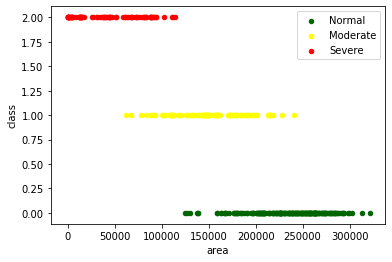

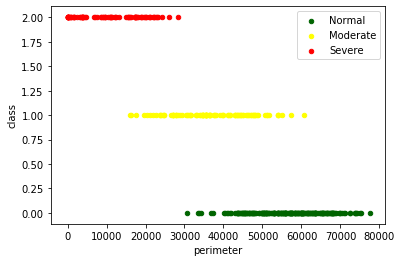

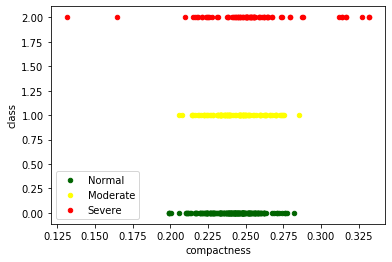

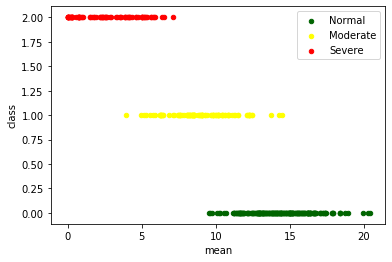

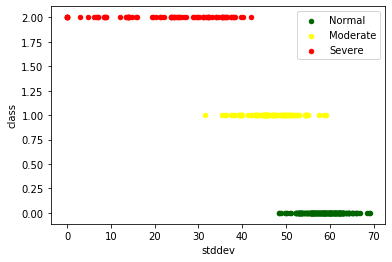

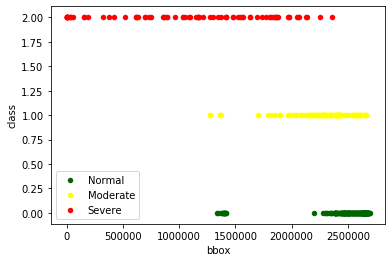

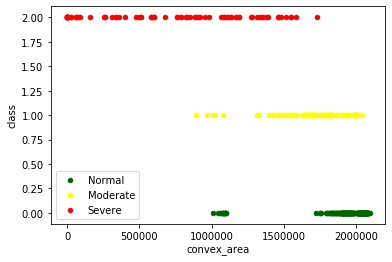

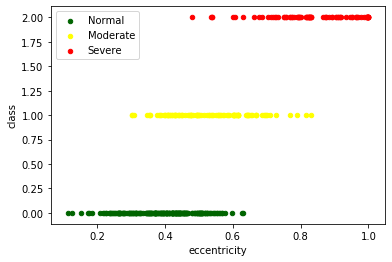

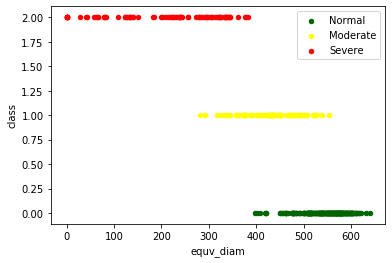

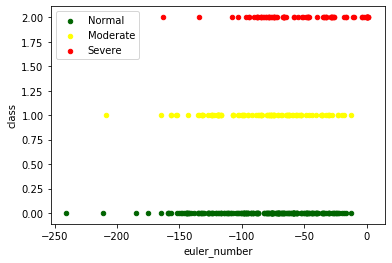

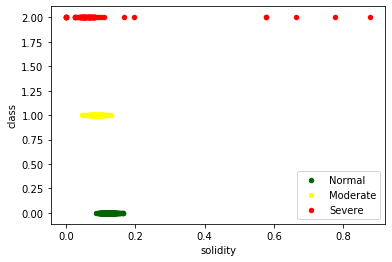

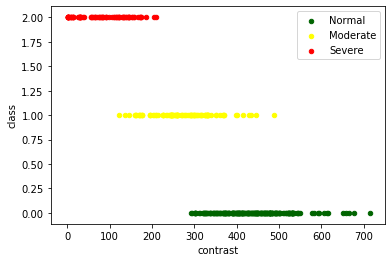

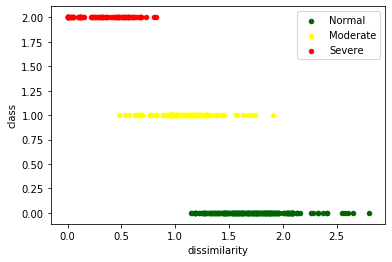

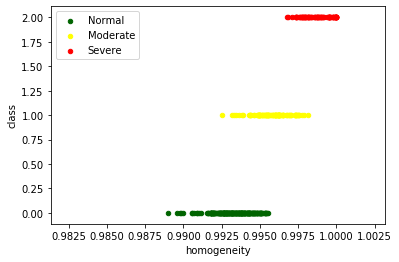

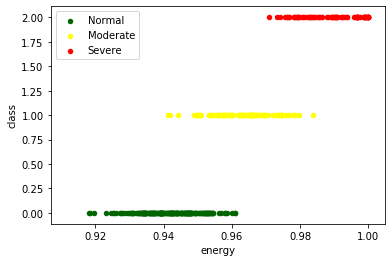

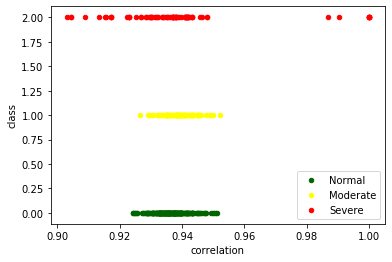

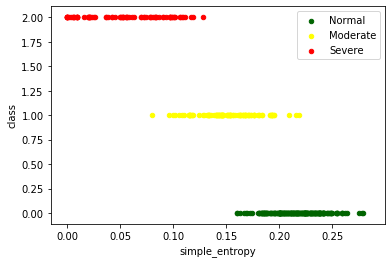

In [0]:
#Plotting Each Feature For Evaluation
area = df1.plot(kind='scatter', x='area', y='class', color='DarkGreen', label='Normal')
df2.plot(kind='scatter', x='area', y='class', color='Yellow', label='Moderate', ax=area)
df3.plot(kind='scatter', x='area', y='class', color='Red', label='Severe', ax=area)

perimeter = df1.plot(kind='scatter', x='perimeter', y='class', color='DarkGreen', label='Normal')
df2.plot(kind='scatter', x='perimeter', y='class', color='Yellow', label='Moderate', ax=perimeter)
df3.plot(kind='scatter', x='perimeter', y='class', color='Red', label='Severe', ax=perimeter)

compactness = df1.plot(kind='scatter', x='compactness', y='class', color='DarkGreen', label='Normal')
df2.plot(kind='scatter', x='compactness', y='class', color='Yellow', label='Moderate', ax=compactness)
df3.plot(kind='scatter', x='compactness', y='class', color='Red', label='Severe', ax=compactness)

mean = df1.plot(kind='scatter', x='mean', y='class', color='DarkGreen', label='Normal')
df2.plot(kind='scatter', x='mean', y='class', color='Yellow', label='Moderate', ax=mean)
df3.plot(kind='scatter', x='mean', y='class', color='Red', label='Severe', ax=mean)

stddev = df1.plot(kind='scatter', x='stddev', y='class', color='DarkGreen', label='Normal')
df2.plot(kind='scatter', x='stddev', y='class', color='Yellow', label='Moderate', ax=stddev)
df3.plot(kind='scatter', x='stddev', y='class', color='Red', label='Severe', ax=stddev)

# energy = df1.plot(kind='scatter', x='energy', y='class', color='DarkGreen', label='Normal')
# df2.plot(kind='scatter', x='energy', y='class', color='Yellow', label='Moderate', ax=energy)
# df3.plot(kind='scatter', x='energy', y='class', color='Red', label='Severe', ax=energy)

bbox = df1.plot(kind='scatter', x='bbox', y='class', color='DarkGreen', label='Normal')
df2.plot(kind='scatter', x='bbox', y='class', color='Yellow', label='Moderate', ax=bbox)
df3.plot(kind='scatter', x='bbox', y='class', color='Red', label='Severe', ax=bbox)

convex_area = df1.plot(kind='scatter', x='convex_area', y='class', color='DarkGreen', label='Normal')
df2.plot(kind='scatter', x='convex_area', y='class', color='Yellow', label='Moderate', ax=convex_area)
df3.plot(kind='scatter', x='convex_area', y='class', color='Red', label='Severe', ax=convex_area)

eccentricity = df1.plot(kind='scatter', x='eccentricity', y='class', color='DarkGreen', label='Normal')
df2.plot(kind='scatter', x='eccentricity', y='class', color='Yellow', label='Moderate', ax=eccentricity)
df3.plot(kind='scatter', x='eccentricity', y='class', color='Red', label='Severe', ax=eccentricity)

equv_diam = df1.plot(kind='scatter', x='equv_diam', y='class', color='DarkGreen', label='Normal')
df2.plot(kind='scatter', x='equv_diam', y='class', color='Yellow', label='Moderate', ax=equv_diam)
df3.plot(kind='scatter', x='equv_diam', y='class', color='Red', label='Severe', ax=equv_diam)

euler_number = df1.plot(kind='scatter', x='euler_number', y='class', color='DarkGreen', label='Normal')
df2.plot(kind='scatter', x='euler_number', y='class', color='Yellow', label='Moderate', ax=euler_number)
df3.plot(kind='scatter', x='euler_number', y='class', color='Red', label='Severe', ax=euler_number)

solidity = df1.plot(kind='scatter', x='solidity', y='class', color='DarkGreen', label='Normal')
df2.plot(kind='scatter', x='solidity', y='class', color='Yellow', label='Moderate', ax=solidity)
df3.plot(kind='scatter', x='solidity', y='class', color='Red', label='Severe', ax=solidity)

contrast = df1.plot(kind='scatter', x='contrast', y='class', color='DarkGreen', label='Normal')
df2.plot(kind='scatter', x='contrast', y='class', color='Yellow', label='Moderate', ax=contrast)
df3.plot(kind='scatter', x='contrast', y='class', color='Red', label='Severe', ax=contrast)

dissimilarity = df1.plot(kind='scatter', x='dissimilarity', y='class', color='DarkGreen', label='Normal')
df2.plot(kind='scatter', x='dissimilarity', y='class', color='Yellow', label='Moderate', ax=dissimilarity)
df3.plot(kind='scatter', x='dissimilarity', y='class', color='Red', label='Severe', ax=dissimilarity)

homogeneity = df1.plot(kind='scatter', x='homogeneity', y='class', color='DarkGreen', label='Normal')
df2.plot(kind='scatter', x='homogeneity', y='class', color='Yellow', label='Moderate', ax=homogeneity)
df3.plot(kind='scatter', x='homogeneity', y='class', color='Red', label='Severe', ax=homogeneity)

energy = df1.plot(kind='scatter', x='energy', y='class', color='DarkGreen', label='Normal')
df2.plot(kind='scatter', x='energy', y='class', color='Yellow', label='Moderate', ax=energy)
df3.plot(kind='scatter', x='energy', y='class', color='Red', label='Severe', ax=energy)

correlation = df1.plot(kind='scatter', x='correlation', y='class', color='DarkGreen', label='Normal')
df2.plot(kind='scatter', x='correlation', y='class', color='Yellow', label='Moderate', ax=correlation)
df3.plot(kind='scatter', x='correlation', y='class', color='Red', label='Severe', ax=correlation)

# shannon_entropy = df1.plot(kind='scatter', x='shannon_entropy', y='class', color='DarkGreen', label='Normal')
# df2.plot(kind='scatter', x='shannon_entropy', y='class', color='Yellow', label='Moderate', ax=shannon_entropy)
# df3.plot(kind='scatter', x='shannon_entropy', y='class', color='Red', label='Severe', ax=shannon_entropy)

simple_entropy = df1.plot(kind='scatter', x='simple_entropy', y='class', color='DarkGreen', label='Normal')
df2.plot(kind='scatter', x='simple_entropy', y='class', color='Yellow', label='Moderate', ax=simple_entropy)
df3.plot(kind='scatter', x='simple_entropy', y='class', color='Red', label='Severe', ax=simple_entropy)

# **IMAGE CLASSIFICATION**

In [0]:
# Importing the dataset
dataset = pd.read_csv('/content/featureExtracted_dataset/Imp_Feature.csv')#imp=4, medimp=7, lessimp=9
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2].values


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
print("Classification Error", 1-metrics.accuracy_score(y_test, y_pred))
print("Precision", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall or Sensitivity", metrics.recall_score(y_test, y_pred, average='macro'))
print("F-Score", metrics.f1_score(y_test, y_pred, average='macro'))

# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=0)

# # Print ROC curve
# plt.plot(fpr,tpr)
# plt.show() 

# # Print AUC
# auc = np.trapz(tpr,fpr)
# print('AUC:', auc)

[0 0 2 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 2 1 2 0 1 0 2 0 1 1 1 2 2 2 0 0 2
 2 1 0 0 0 1 0 0 1 0 0 0 0 2 0 0 1 0 0 0 0 1 2 0 1 1 2 0 2 1 1 0 0 0 0 0 0
 2 0 1 1 1]
[0 0 2 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 2 1 2 0 2 0 1 0 1 1 1 2 2 2 0 0 2
 2 1 0 0 0 1 0 0 0 0 0 1 0 2 0 0 1 0 0 0 0 1 2 0 1 1 2 0 2 1 1 0 0 0 0 0 0
 1 0 1 1 1]
Accuracy 0.9113924050632911
Classification Error 0.08860759493670889
Precision 0.8988221081244337
Recall or Sensitivity 0.8995622263914947
F-Score 0.8974445570190251


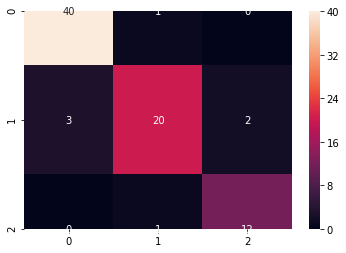

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True)

In [0]:
# test_input = dataset.iloc[1, 0:9].values
# test_input = sc.transform([test_input])
# y_pred_test = classifier.predict(test_input)
# print(y_pred_test)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


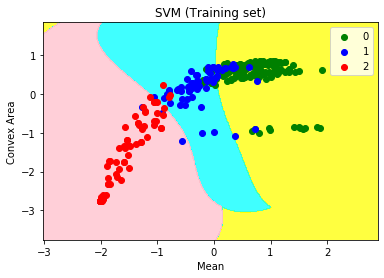

In [0]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'cyan', 'pink')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('green', 'blue', 'red'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Mean')
plt.ylabel('Convex Area')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


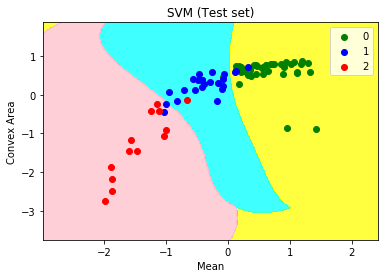

In [0]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'cyan', 'pink')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('green', 'blue', 'red'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Mean')
plt.ylabel('Convex Area')
plt.legend()
plt.show()

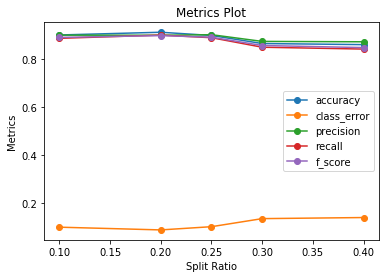

In [0]:
# x axis values 
split_ratio = [0.10, 0.20, 0.25, 0.30, 0.40] 
# corresponding y axis values 
accuracy = [0.9,0.9113924050632911,0.8979591836734694,0.864406779661017,0.8598726114649682]
class_error = [0.09999999999999998,0.08860759493670889,0.10204081632653061,0.13559322033898302,0.14012738853503182]
precision = [0.8993265993265993,0.8988221081244337,0.9012085769980507,0.873257348916578,0.8716639433551198]
recall = [0.886039886039886,0.8995622263914947,0.8886572550167019,0.849034749034749,0.8413268458449181]
f_score = [0.8898635477582846,0.8974445570190251,0.8907954417663156,0.8561958874458875,0.8474652091308519]
  
# plotting the points  
plt.plot(split_ratio, accuracy, marker='o', label="accuracy") 
plt.plot(split_ratio, class_error, marker='o', label="class_error") 
plt.plot(split_ratio, precision, marker='o', label="precision") 
plt.plot(split_ratio, recall, marker='o', label="recall") 
plt.plot(split_ratio, f_score, marker='o', label="f_score") 

# naming the x axis 
plt.xlabel('Split Ratio') 
# naming the y axis 
plt.ylabel('Metrics') 
  
# giving a title to my graph 
plt.title('Metrics Plot') 
   
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

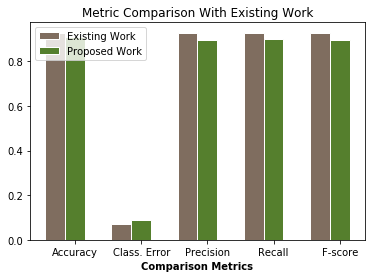

In [0]:
#set width of bar
barWidth = 0.3

# corresponding y axis values 
existing_work = [0.9291, 0.0709, 0.929, 0.929, 0.929]
proposed_work = [0.911, 0.087, 0.898, 0.899, 0.897]

# Set position of bar on X axis
r1 = np.arange(len(existing_work))
r2 = [x+barWidth for x in r1]

# Set position of bar on X axis
plt.bar(r1, existing_work, color='#7f6d5f', width=barWidth, edgecolor='white', label='Existing Work')
plt.bar(r2, proposed_work, color='#557f2d', width=barWidth, edgecolor='white', label='Proposed Work')

# Add xticks on the middle of the group bars
plt.xlabel('Comparison Metrics', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(existing_work))], ['Accuracy', 'Class. Error', 'Precision', 'Recall', 'F-score'])
  
# giving a title to my graph 
plt.title('Metric Comparison With Existing Work') 
   
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

# **COMPLETE CODE FOR TESTING WITH A TEST IMAGE**

<class 'numpy.ndarray'>
1632   2464
Original Image


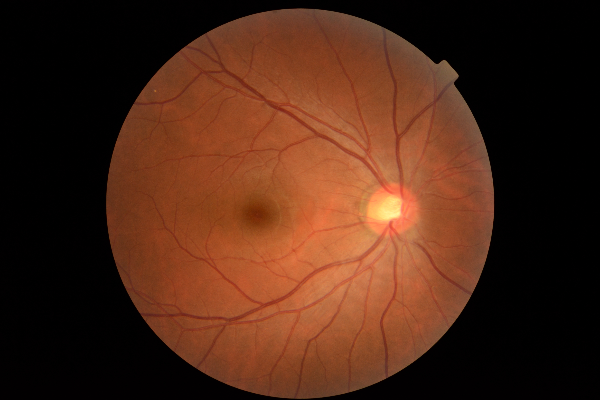

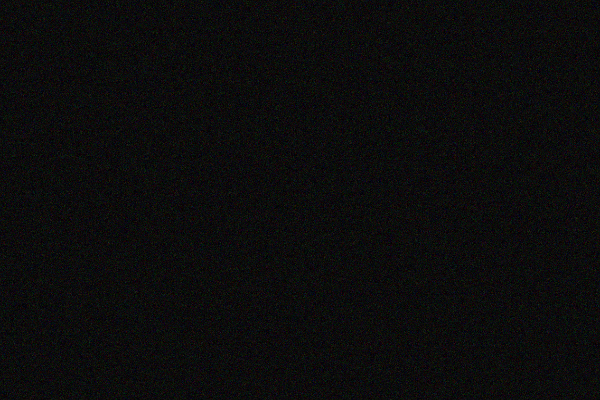

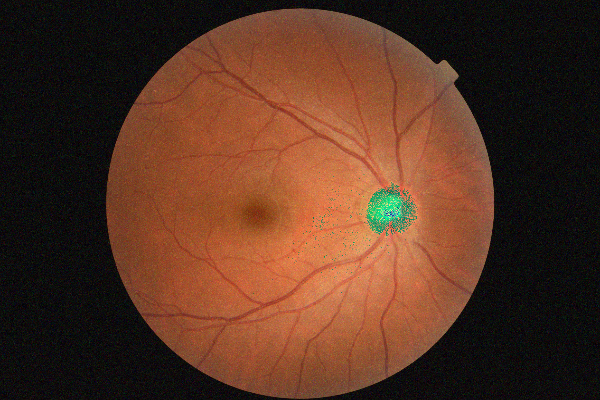

Final Statistically Enhanced - Green Channel Grey Image


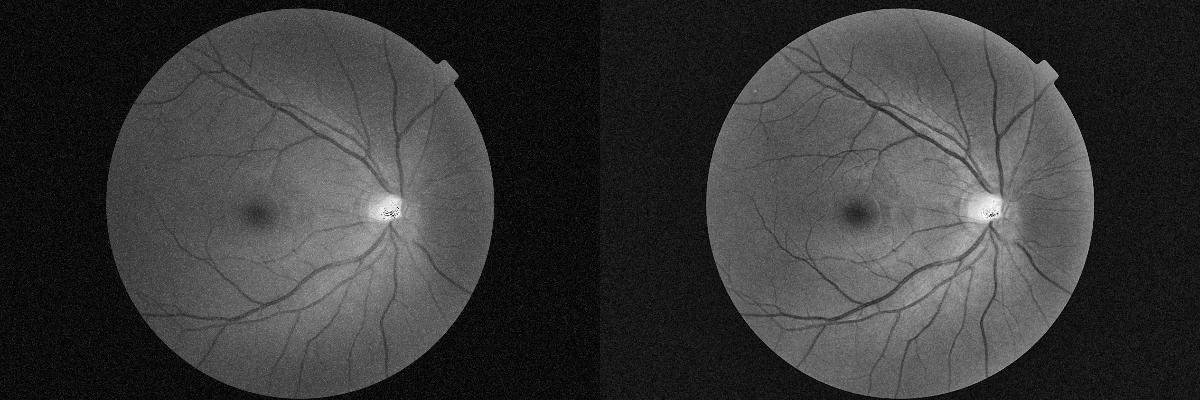

Segmentation Process


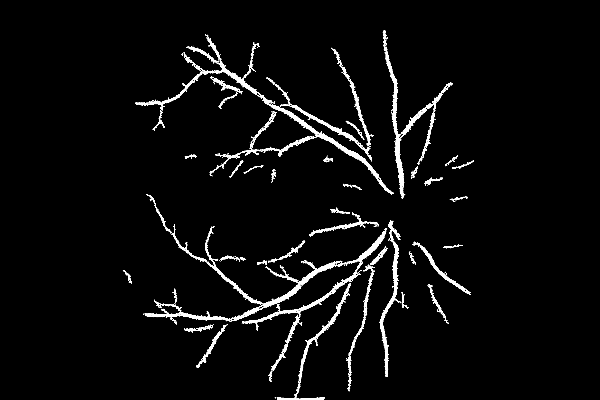

['mean', 'convex_area', 'class'] 
 [11.38487976866883, 1820997, 0]
Original Class -  0
Predicted Class -  [0]


In [0]:
# reading the image
img_test = cv2.imread('/content/dataset/1_normal/NL_002.png')
class_img_test = 0
print(type(img_test))
print(img_test.shape[0]," ",img_test.shape[1])
# img_test=cv2.resize(img_test, (600,400))
print("Original Image")
cv2_imshow(cv2.resize(img_test, (600,400)))


#INTRODUCING RANDOM 
img1 = img_test.copy()
cv2.randn(img1,(10,10,10),(15,15,15))
cv2_imshow(cv2.resize(img1, (600,400)))
img_test = img_test+img1
cv2_imshow(cv2.resize(img_test, (600,400)))

# taking only the green channel
blue_test, green_test, red_test = cv2.split(img_test)
# print("Green Channel Grey Image")
# cv2_imshow(cv2.resize(green_test, (600,400)))

# Contrast Improvement
ck_test = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
clahe_test = ck_test.apply(green_test)

# Sharpening
sk_test = np.array([[-1,-1,-1,-1,-1],
               [-1,2,2,2,-1],
               [-1,2,8,2,-1],
               [-1,2,2,2,-1],
               [-1,-1,-1,-1,-1]]) / 8.0
sharpened_test = cv2.filter2D(clahe_test, -1, sk_test)

# Noise Removal
enhanced_test = cv2.medianBlur(sharpened_test, 5)

#PLOTTING
finalEnhanced_test = np.hstack((green_test, enhanced_test))
print("Final Statistically Enhanced - Green Channel Grey Image")
cv2_imshow(cv2.resize(finalEnhanced_test, (1200,400)))

#SEGMENTATION
ck_seg = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

morpClose1 = cv2.morphologyEx(enhanced_test, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=1)
morpClose2 = cv2.morphologyEx(morpClose1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=1)
morpClose3 = cv2.morphologyEx(morpClose2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations=1)
morpClose4 = cv2.morphologyEx(morpClose3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations=1)
morpClose5 = cv2.morphologyEx(morpClose4, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations=1)
morpClose6 = cv2.morphologyEx(morpClose5, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations=1)

diff1_test = cv2.subtract(morpClose6,enhanced_test)
dfc1_test = ck_seg.apply(diff1_test)
ret1_test,dfct1_test = cv2.threshold(dfc1_test, 15, 255, cv2.THRESH_BINARY)

mask1_test = np.ones(dfc1_test.shape[:2], dtype="uint8")*255#shape[:2]=>shape[0] and shape[1]
#f6.copy() - to use a copy of the image since findContours alters the image
#cv2.RETR_LIST - retrieves all of the contours without establishing any hierarchical relationships
#cv2.CHAIN_APPROX_SIMPLE - all the boundary points are stored in memory efficient manner
img1_test, contours1_test, hierarchy1_test = cv2.findContours(dfct1_test.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours1_test:#contours represent the shapes of objects found in an image
  if cv2.contourArea(cnt)<=300:# All contours of area less than 300
    cv2.drawContours(mask1_test, [cnt], -1, 0, -1)#Destination image, input contours - each contour is stored as a point vector, -1 signifies drawing all contours, 0 indicates black colored contours, -1 indicates the contour interiors are drawn
im1_test = cv2.bitwise_and(dfc1_test, dfc1_test, mask=mask1_test)#adds param1 with param2 and mask is optional but here mask is req and f5 should remain so f5^f5 = f5
ret_test, fin1_test = cv2.threshold(im1_test, 15, 255, cv2.THRESH_BINARY_INV)#Segmentation using Threshholding
newfin1_test = cv2.erode(fin1_test, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), iterations=1)#Eroded to get the edges more joined
final_seg1_test = 255 - newfin1_test#Inversing the image
# print(diff1)
#PLOTTING
# seg11_test = np.hstack((diff1_test, dfc1_test, dfct1_test, mask1_test, im1_test, fin1_test, newfin1_test, final_seg1_test))
print("Segmentation Process")
cv2_imshow(cv2.resize(final_seg1_test, (600,400)))#4800

#Feature Extraction
kernel_hp_test = np.array([[1,1,1],
                      [1,-8,1],
                      [1,1,1]])
feature_vs_class_test = []
feature_vs_class_test.append(['mean', 'convex_area', 'class'])
# prefix_test = "/content/seg_dataset/1_normal/NL_001.png"
# img_test = cv2.imread(prefix, cv2.IMREAD_GRAYSCALE)
#tempList for appending values
tempList_test = []
# area_test = cv2.countNonZero(final_seg1_test)
# tempList_test.append(area_test)
# highpass_test = cv2.filter2D(final_seg1_test, -1, kernel_hp_test)
# perimeter_test = cv2.countNonZero(highpass_test)
# if(perimeter_test<10):
#   perimeter_test = 10
# tempList_test.append(perimeter_test)
# if(area_test!=0):
#   compactness_test = perimeter_test/area_test
# tempList_test.append(compactness_test)
mean_test, std_test = cv2.meanStdDev(final_seg1_test)
tempList_test.append(mean_test[0][0])
# tempList_test.append(std_test[0][0])

#  _, (cH, cV, cD) = dwt2(final_seg1_test.T, 'db1')
#  Energy_test = (cH**2 + cV**2 + cD**2).sum()/final_seg1_test.size
#  tempList_test.append(Energy_test)

props_test = regionprops(final_seg1_test)
# # if(i!=10 and i!=31 and i!=36 and i!=49 and i!=51 and i!=77):
# tempList_test.append(props_test[0].bbox_area)
tempList_test.append(props_test[0].convex_area)
# tempList_test.append(props_test[0].eccentricity)
# tempList_test.append(props_test[0].centroid)
# tempList_test.append(props_test[0].equivalent_diameter)
# tempList_test.append(props_test[0].euler_number)
# tempList_test.append(props_test[0].solidity)
# glcm_test = greycomatrix(final_seg1_test, [1], [0])
# tempList_test.append(greycoprops(glcm_test, 'contrast')[0][0])
# tempList_test.append(greycoprops(glcm_test, 'dissimilarity')[0][0])#direc moment
# tempList_test.append(greycoprops(glcm_test, 'homogeneity')[0][0])#inv diff moment
# tempList_test.append(greycoprops(glcm_test, 'energy')[0][0])
# tempList_test.append(greycoprops(glcm_test, 'correlation')[0][0])

# # shannon's entropy
# tempList_test.append(s_entropy(img_test))

# simple entropy
# tempList_test.append(entropy_simple(final_seg1_test))
tempList_test.append(class_img_test)
feature_vs_class_test.append(tempList_test)
print(feature_vs_class_test[0],"\n",feature_vs_class_test[1])

# Predicting the Test set results
test_input_test = [feature_vs_class_test[1][0], feature_vs_class_test[1][1]]
test_output = feature_vs_class_test[1][2]
test_input_test = sc.transform([test_input_test])
y_pred_test = classifier.predict(test_input_test)
print("Original Class - ", test_output)
print("Predicted Class - ", y_pred_test)

<class 'numpy.ndarray'>
1632   2464
Original Image


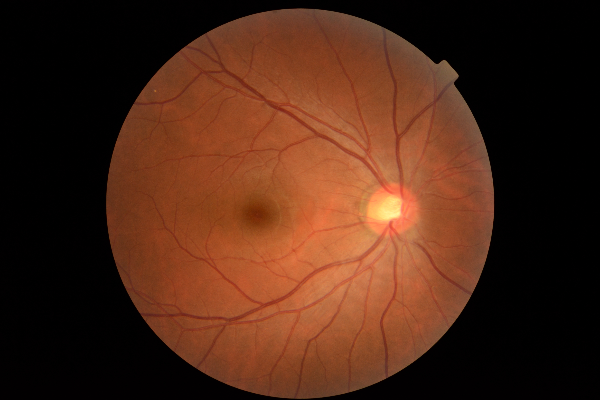

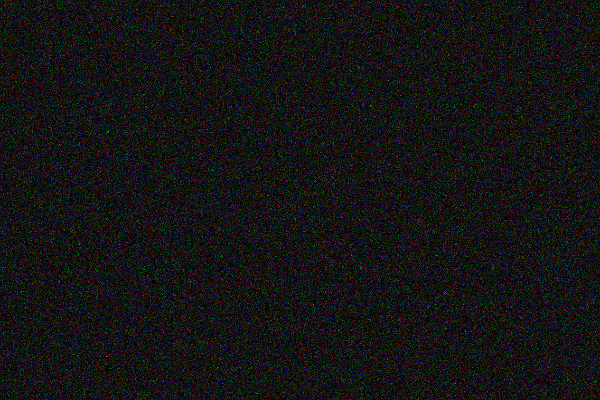

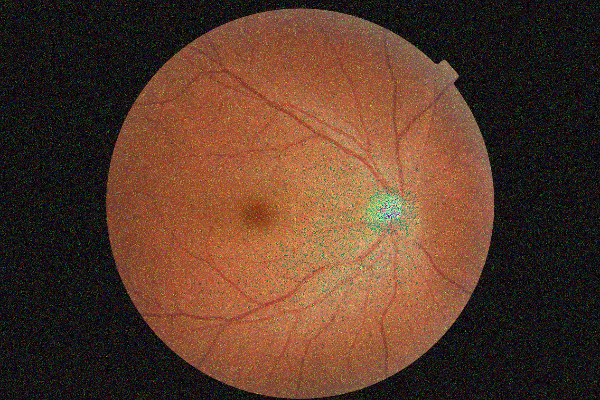

In [0]:
# reading the image
img_test = cv2.imread('/content/dataset/1_normal/NL_002.png')
class_img_test = 0
print(type(img_test))
print(img_test.shape[0]," ",img_test.shape[1])
# img_test=cv2.resize(img_test, (600,400))
print("Original Image")
cv2_imshow(cv2.resize(img_test, (600,400)))

img1 = img_test.copy()
#INTRODUCING RANDOM 
cv2.randn(img1,(0,0,0),(50,50,50))
cv2_imshow(cv2.resize(img1, (600,400)))
img_test = img_test+img1
cv2_imshow(cv2.resize(img_test, (600,400)))